# 07-07 기울기 소실(Gradient Vanishing)과 폭주(Exploding)


출처:https://wikidocs.net/61375

 입력층에 가까운 층들에서 가중치들이 업데이트가 제대로 되지 않으면 결국 최적의 모델을 찾을 수 없게 됩니다. 이를 기울기 소실(Gradient Vanishing) 이라고 합니다.

반대의 경우도 있습니다. 기울기가 점차 커지더니 가중치들이 비정상적으로 큰 값이 되면서 결국 발산되기도 합니다. 이를 기울기 폭주(Gradient Exploding) 라고 하며, 다음 챕터에서 배울 순환 신경망(Recurrent Neural Network, RNN)에서 쉽게 발생

## 1. ReLU와 ReLU의 변형들

. 시그모이드 함수를 사용하면 입력의 절대값이 클 경우에 시그모이드 함수의 출력값이 0 또는 1에 수렴하면서 기울기가 0에 가까워집니다. 

 역전파 과정에서 전파 시킬 기울기가 점차 사라져서 입력층 방향으로 갈 수록 제대로 역전파가 되지 않는 기울기 소실 문제가 발생할 수 있습니다.

기울기 소실을 완화하는 가장 간단한 방법은 은닉층의 활성화 함수로 시그모이드나 하이퍼볼릭탄젠트 함수 대신에 ReLU나 ReLU의 변형 함수와 같은 Leaky ReLU를 사용하는 것입니다.

은닉층에서는 시그모이드 함수를 사용하지 마세요.
Leaky ReLU를 사용하면 모든 입력값에 대해서 기울기가 0에 수렴하지 않아 죽은 ReLU 문제를 해결합니다.
은닉층에서는 ReLU나 Leaky ReLU와 같은 ReLU 함수의 변형들을 사용하세요.

## 2. 그래디언트 클리핑(Gradient Clipping)

그래디언트 클리핑은 말 그대로 기울기 값을 자르는 것을 의미합니다. 기울기 폭주를 막기 위해 임계값을 넘지 않도록 값을 자릅니다. 다시 말해서 임계치만큼 크기를 감소

이는 뒤에서 배울 신경망인 RNN에서 유용
 RNN은 역전파 과정에서 시점을 역행하면서 기울기를 구하는데, 이때 기울기가 너무 커질 수 있기 때문

코드는 아래와 같다.

from tensorflow.keras import optimizers

Adam = optimizers.Adam(lr=0.0001, clipnorm=1.)


## 3. 가중치 초기화(Weight initialization)


### 1) 세이비어 초기화(Xavier Initialization)
 

같은 모델을 훈련시키더라도 가중치가 초기에 어떤 값을 가졌느냐에 따라서 모델의 훈련 결과가 달라지기도 합니다. 다시 말해 가중치 초기화만 적절히 해줘도 기울기 소실 문제과 같은 문제를 완화시킬 수 있습니다.



세이비어 초기화는 여러 층의 기울기 분산 사이에 균형을 맞춰서 특정 층이 너무 주목을 받거나 다른 층이 뒤쳐지는 것을 막습니다. 그런데 세이비어 초기화는 시그모이드 함수나 하이퍼볼릭 탄젠트 함수와 같은 S자 형태인 활성화 함수와 함께 사용할 경우에는 좋은 성능을 보이지만, ReLU와 함께 사용할 경우에는 성능이 좋지 않습니다. ReLU 함수 또는 ReLU의 변형 함수들을 활성화 함수로 사용할 경우에는 다른 초기화 방법을 사용하는 것이 좋은데, 이를 He 초기화(He initialization)라고 합니다.


### 2) He 초기화(He initialization)

다만, He 초기화는 세이비어 초기화와 다르게 다음 층의 뉴런의 수를 반영하지 않습니다. 

* 시그모이드 함수나 하이퍼볼릭탄젠트 함수를 사용할 경우에는 세이비어 초기화 방법이 효율적입니다.

* ReLU 계열 함수를 사용할 경우에는 He 초기화 방법이 효율적입니다.

* ReLU + He 초기화 방법이 좀 더 보편적입니다.


## 4. 배치 정규화(Batch Normalization)


### 1) 내부 공변량 변화(Internal Covariate Shift)

배치 정규화를 이해하기 위해서는 내부 공변량 변화(Internal Covariate Shift)를 이해할 필요가 있습니다. 내부 공변량 변화란 학습 과정에서 층 별로 입력 데이터 분포가 달라지는 현상

이전 층들의 학습에 의해 이전 층의 가중치 값이 바뀌게 되면, 현재 층에 전달되는 입력 데이터의 분포가 현재 층이 학습했던 시점의 분포와 차이가 발생
 
 배치 정규화를 제안한 논문에서는 기울기 소실/폭주 등의 딥 러닝 모델의 불안전성이 층마다 입력의 분포가 달라지기 때문이라고 주장합니다. (배치 정규화를 제안한 논문에서는 이렇게 주장했지만, 뒤에 이어서는 이에 대한 반박들이 나오기는 했습니다. 하지만 그 이유가 어찌되었든 배치 정규화가 학습을 돕는다는 것은 명백합니다.)
 
* 공변량 변화는 훈련 데이터의 분포와 테스트 데이터의 분포가 다른 경우를 의미합니다.
* 내부 공변량 변화는 신경망 층 사이에서 발생하는 입력 데이터의 분포 변화를 의미합니다.

### 2) 배치 정규화(Batch Normalization)


배치 정규화(Batch Normalization)는 표현 그대로 한 번에 들어오는 배치 단위로 정규화하는 것을 말합니다. 배치 정규화는 각 층에서 활성화 함수를 통과하기 전에 수행됩니다. 


 입력에 대해 평균을 0으로 만들고, 정규화를 합니다. 그리고 정규화 된 데이터에 대해서 스케일과 시프트를 수행
 

* 배치 정규화를 사용하면 시그모이드 함수나 하이퍼볼릭탄젠트 함수를 사용하더라도 기울기 소실 문제가 크게 개선됩니다.

* 가중치 초기화에 훨씬 덜 민감해집니다.

* 훨씬 큰 학습률을 사용할 수 있어 학습 속도를 개선시킵니다.

* 미니 배치마다 평균과 표준편차를 계산하여 사용하므로 훈련 데이터에 일종의 잡음 주입의 부수 효과로 과적합을 방지하는 효과도 냅니다. 다시 말해, 마치 드롭아웃과 비슷한 효과를 냅니다. 물론, 드롭 아웃과 함께 사용하는 것이 좋습니다.

* 배치 정규화는 모델을 복잡하게 하며, 추가 계산을 하는 것이므로 테스트 데이터에 대한 예측 시에 실행 시간이 느려집니다. 그래서 서비스 속도를 고려하는 관점에서는 배치 정규화가 꼭 필요한지 고민이 필요합니다.

* 배치 정규화의 효과는 굉장하지만 내부 공변량 변화때문은 아니라는 논문도 있습니다. :

### 3) 배치 정규화의 한계

1. 미니 배치 크기에 의존적이다.

배치 정규화는 너무 작은 배치 크기에서는 잘 동작하지 않을 수 있습니다. 단적으로 배치 크기를 1로 하게되면 분산은 0이 됩니다. 

2. RNN에 적용하기 어렵다.
뒤에서 배우겠지만, RNN은 각 시점(time step)마다 다른 통계치를 가집니다. 이는 RNN에 배치 정규화를 적용하는 것을 어렵게 만듭니다. RNN에서 배치 정규화를 적용하기 위한 몇 가지 논문이 제시되어 있지만, 여기서는 이를 소개하는 대신 배치 크기에도 의존적이지 않으며, RNN에도 적용하는 것이 수월한 층 정규화(layer normalization)라는 방법을 소개하고자 합니다.



##  5.  층 정규화(Layer Normalization)

층 정규화를 이해하기에 앞서 배치 정규화를 시각화해보겠습니다. 다음은 
이 3이고, 특성의 수가 4일 때의 배치 정규화를 보여줍니다. 미니 배치란 동일한 특성(feature) 개수들을 가진 다수의 샘플들을 의미함을 상기합시다.


In [1]:
from IPython.display import Image

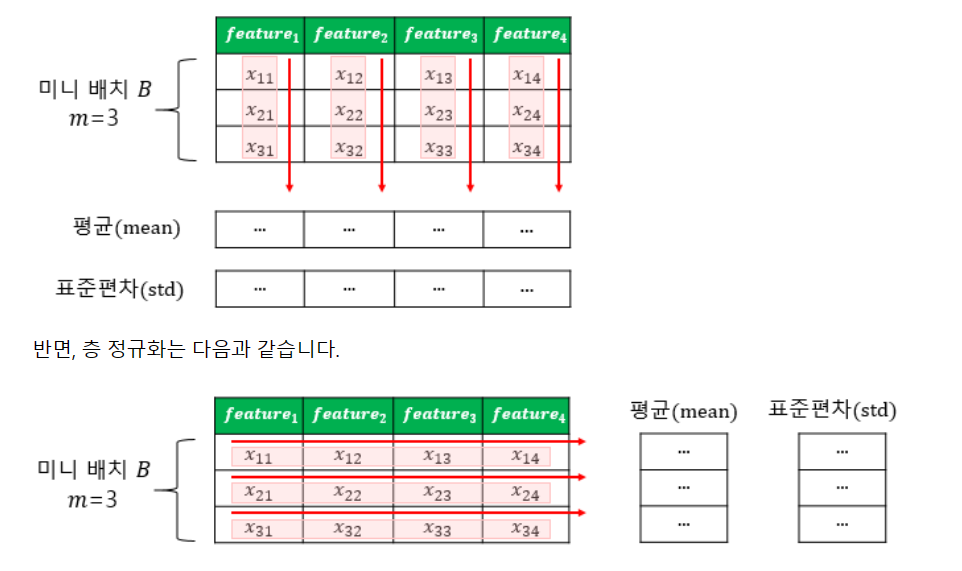

In [2]:
Image("image/07-07-1 Layer Normalization.png")
